In [1]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-12-2022)' )

loaded gammapy version: 0.1.dev19056+g5a5f803 
Supposed to be 1.0 (21-12-2022)


In [2]:
import pyximport
pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy
from gammapy.maps import Map
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    GaussianSpatialModel,
    Models,
    FoVBackgroundModel,
)
from gammapy.estimators import FluxPoints
from gammapy.estimators import  FluxPointsEstimator
import sys
sys.path.append('/home/katrin/Documents/nuisance_summary/')
from Dataset_Creation import sys_dataset
import Dataset_load 

## Read dataset

In [3]:
dataset_asimov = Dataset_load.create_asimov()

## Varying the Exposure

In [4]:
savefig = True
picformat = 'svg'

bias = 0.
bias_assumed = 0.1
resolution = 0.
print(bias)


0.0


In [5]:

def create_dataset(b, s, bias_assumed):
    sys_d_cor = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = 0,
                        tilt = 0,
                        bias = b, 
                        resolution = s,
                        rnd = False,
                        e_reco_creation=10)
    dataset_conv = sys_d_cor.create_dataset()
    dataset_conv_N = sys_d_cor.create_dataset_N(1)
    dataset_conv_N.models.parameters['resolution'].frozen  = True
    dataset_conv_N.e_reco_n = 10
    
    # new fine binned IRF Model
    dataset_conv_N_fine =  sys_d_cor.create_dataset_N(10)

    zero = 1e-12
    penalising_invcovmatrix = np.zeros((2, 2))
    if b ==0 :
        b_ = zero
    else:
        b_ = b
    np.fill_diagonal(penalising_invcovmatrix, [1/bias_assumed**2, 1/zero**2])
    dataset_conv_N.penalising_invcovmatrix = penalising_invcovmatrix
    dataset_conv_N.irf_model.eff_area_model = None
    
    return dataset_conv, dataset_conv_N, dataset_conv_N_fine

dataset, dataset_N , _ = create_dataset(bias, resolution, bias_assumed)

In [6]:
path = f'data/2_model_{bias}_sigma_0.0.yml'
dataset = Dataset_load.load_dataset_N(dataset, path)     

path = f'data/2_model_nui_{bias}_sigma_0.0.yml'
dataset_N = Dataset_load.load_dataset_N(dataset_N, path)     

In [7]:
dataset.models.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,is_penalised,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,bool,str1
spectral,index,2.3014e+00,,6.185e-02,nan,nan,False,False,False,
spectral,amplitude,1.0023e-12,cm-2 s-1 TeV-1,9.013e-14,nan,nan,False,True,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
spatial,lon_0,8.3631e+01,deg,0.000e+00,nan,nan,True,False,False,
spatial,lat_0,2.2018e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,False,
spatial,sigma,1.9177e-02,deg,1.107e-02,0.000e+00,nan,False,False,False,
spatial,e,0.0000e+00,,0.000e+00,0.000e+00,1.000e+00,True,False,False,
spatial,phi,0.0000e+00,deg,0.000e+00,nan,nan,True,False,False,
spectral,norm,1.0000e+00,,2.066e-03,nan,nan,False,True,False,


In [8]:
dataset_N.models.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,is_penalised,link
str12,str13,float64,str14,float64,float64,float64,bool,bool,bool,str1
spectral,index,2.3015e+00,,7.230e-02,nan,nan,False,False,False,
spectral,amplitude,1.0023e-12,cm-2 s-1 TeV-1,9.395e-14,nan,nan,False,True,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
spatial,lon_0,8.3631e+01,deg,0.000e+00,nan,nan,True,False,False,
spatial,lat_0,2.2018e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,False,
spatial,sigma,1.9177e-02,deg,1.106e-02,0.000e+00,nan,False,False,False,
spatial,e,0.0000e+00,,0.000e+00,0.000e+00,1.000e+00,True,False,False,
spatial,phi,0.0000e+00,deg,0.000e+00,nan,nan,True,False,False,
e_reco_model,bias,8.6442e-04,,4.148e-02,nan,nan,False,False,True,


## Import asymm errors:


In [11]:
import json
with open("/home/katrin/Documents/nuisance_summary/config.json") as json_data_file:
    config = json.load(json_data_file)

import sys
sys.path.append(config['local']['path']+'/nuisance_summary/E_reco/Bias/')
import upper_limit_18_02

In [10]:
def get_er_neg_pos(parameter, N):
    filename = '5_scan_'+parameter
    if N:
        filename += '_N'
    filename += '.yaml'
    with open('data/'+filename) as file:
        stat_profile_N_a = yaml.load( file, Loader=yaml.FullLoader)
        
    ll_N_a = stat_profile_N_a.copy()
    ul_N_a = upper_limit_18_02.upper_limit(ll_N_a,0,0)    
    min_, er_neg, er_pos = ul_N_a.likelihood_error_asymmetric()
    min_ = min_[0]; er_neg = er_neg[0]; er_pos = er_pos[0]; 
    return er_neg, er_pos

In [ ]:
valuies_asimov_N = []
valuies_asimov = []

par_names = ['norm', 'amplitude', 'index']

for par in par_names:

    er_neg, er_pos = get_er_neg_pos(par, True)
    valuies_asimov_N.append([dataset_asimov_N.models.parameters[par].value, er_neg, er_pos])
    
    er_neg, er_pos = get_er_neg_pos(par, False)
    valuies_asimov.append([dataset_asimov.models.parameters[par].value, er_neg, er_pos])

print(valuies_asimov_N)
print(valuies_asimov)



### Import Rnd

In [9]:
infos = np.loadtxt("data/7a_P_draw_info.txt")
pars = np.loadtxt("data/7a_P_draw_par.txt")
flux = np.loadtxt("data/7a_P_draw_flux.txt")
flux2e = np.loadtxt("data/7a_P_draw_flux2e.txt")

lem = len(infos)
N_max = 1000
N = np.min([lem, N_max])

print(N)

shift_rnds = infos[:N_max,0]
resolution_rnds = infos[:N_max,1]
stat_sums = infos[:N_max,2]


#amplitude', 'index', 'norm', 'tilt
amplitudes = pars[:N_max,0:2] 
indices = pars[:N_max,2:4] 
norms = pars[:N_max,4:6]
tilts = pars[:N_max,6:8]



200


/tmp/ipykernel_13366/843249431.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
/tmp/ipykernel_13366/843249431.py:23: RuntimeWarning: divide by zero encountered in true_divide
  np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
/tmp/ipykernel_13366/843249431.py:23: RuntimeWarning: invalid value encountered in true_divide
  np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
/tmp/ipykernel_13366/843249431.py:22: RuntimeWarning: invalid value encountered in multiply
  ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *


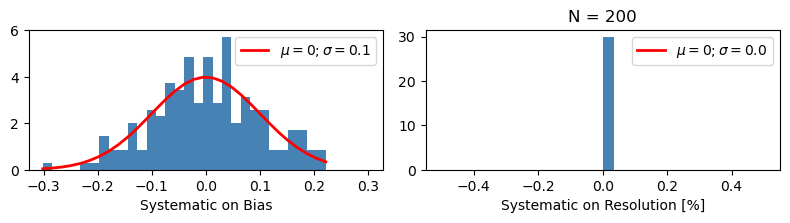

In [11]:
fig, (axs, ax1) = plt.subplots(1,2, figsize = (2*4,7/3))
nbins = 30
count, bins, ignored = axs.hist(shift_rnds, nbins, density=True, color = 'steelblue')
sigma =bias_assumed
mu = 0
axs.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', label = f'$\mu = {mu}; \sigma = {sigma}$')

axs.set_xlabel("Systematic on Bias")
axs.legend()

x = axs.get_xlim()
deltax = np.max([ mu - x[0] , x[1] - mu ])
axs.set_xlim(mu -deltax, 
                mu + deltax)


count, bins, ignored = ax1.hist(resolution_rnds, nbins, density=True, color = 'steelblue')
sigma =resolution
mu = 0
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', label = f'$\mu = {mu}; \sigma = {sigma:.3}$')

ax1.set_xlabel("Systematic on Resolution [%]")
ax1.set_title(f"N = {N}")
ax1.legend()

x = axs.get_xlim()
deltax = np.max([ mu - x[0] , x[1] - mu ])
axs.set_xlim(mu -deltax, 
                mu + deltax)
plt.tight_layout()
if savefig:
    fig.savefig(f"plots/7b_rnd_sys_{bias}_{N}." + picformat)   
    


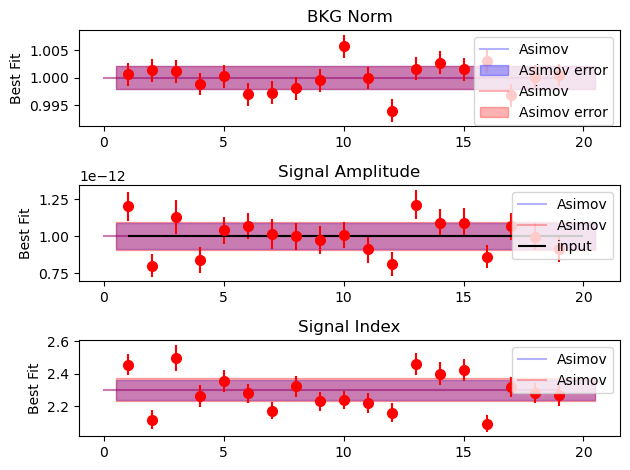

In [12]:
fig, axs = plt.subplots(3,1)

axs[0].set_title("BKG Norm")
axs[1].set_title("Signal Amplitude")
axs[2].set_title("Signal Index")

N_plot = 20
labels = [ '-10%', '0%', '10%']

colors = ['blue', 'red']
for i, d in enumerate([dataset, dataset_N]):
    
    best = d.models[-1].parameters['norm'].value
    er = d.models[-1].parameters['norm'].error
    axs[0].plot( [best] * N_plot, color  = colors[i], alpha = 0.3, label = "Asimov")
    axs[0].fill_betweenx( [best-er , best + er], 0.5, N_plot+0.5, color  = colors[i], alpha = 0.3,
                        label = "Asimov error")
    
    best = d.models[0].parameters['amplitude'].value
    er = d.models[0].parameters['amplitude'].error
    axs[1].fill_betweenx( [best-er , best + er], 0.5, N_plot+0.5, color  = colors[i], alpha = 0.3)
    axs[1].plot( [best] * N_plot, color  = colors[i], alpha = 0.3, label = "Asimov")

    best = d.models[0].parameters['index'].value
    er = d.models[0].parameters['index'].error
    axs[2].fill_betweenx( [best-er , best + er], 0.5, N_plot+0.5, color  = colors[i], alpha = 0.3)
    axs[2].plot( [best] * N_plot, color  = colors[i], alpha = 0.3, label = "Asimov")

for i, a in enumerate(norms[1:N_plot]):
    axs[0].errorbar(x= i+1, y = a[0], yerr = a[1], fmt= 'o', color =  'red',markersize=7)
#axs[0].hlines( norms[0][0], 1, N, label = "input", color = 'black')


for i, a in enumerate(amplitudes[1:N_plot]):
    axs[1].errorbar(x= i+1, y = a[0], yerr = a[1], fmt= 'o', color =  'red',markersize=7)
axs[1].hlines( 1e-12, 1, N_plot, label = "input", color ='black')


for i, a in enumerate(indices[1:N_plot]):
    axs[2].errorbar(x= i+1, y = a[0], yerr = a[1], fmt= 'o', color =  'red',markersize=7)
#axs[2].hlines( indices[0][0], 1, N, label = "input", color ='black')



plt.tight_layout()
for a in axs:
    a.legend(); 
    a.set_ylabel('Best Fit'); 

plt.tight_layout()    
#if savefig:
#    fig.savefig(f"plots/7b_best_fit_{factor}_{N}.pdf")   


In [13]:

valuies = [norms, amplitudes, indices]

valuies_asimov = [[dataset.models[-1].parameters['norm'].value, 
                   dataset.models[-1].parameters['norm'].error],
                  [dataset.models[0].parameters['amplitude'].value, 
                   dataset.models[0].parameters['amplitude'].error],
                  [dataset.models[0].parameters['index'].value, 
                   dataset.models[0].parameters['index'].error],]


valuies_asimov_N = [[dataset_N.models[-1].parameters['norm'].value, 
                   dataset_N.models[-1].parameters['norm'].error],
                  [dataset_N.models[0].parameters['amplitude'].value, 
                   dataset_N.models[0].parameters['amplitude'].error],
                  [dataset_N.models[0].parameters['index'].value, 
                   dataset_N.models[0].parameters['index'].error],]
is_within_norm = []
is_within_amplitude = []
is_within_index = []
is_within_norm_N = []
is_within_amplitude_N = []
is_within_index_N = []

i = 0
for n in norms:
    larger = np.all(n[0] >= (valuies_asimov[0][0] - valuies_asimov[0][1]))
    smaller = np.all(n[0] <= (valuies_asimov[0][0] + valuies_asimov[0][1]))
    is_within_norm.append(larger and smaller)
    
    larger = np.all(n[0] >= (valuies_asimov_N[0][0] - valuies_asimov_N[0][1]))
    smaller = np.all(n[0] <= (valuies_asimov_N[0][0] + valuies_asimov_N[0][1]))
    is_within_norm_N.append(larger and smaller)
    
for a in amplitudes:
    larger = np.all(a[0] >= (valuies_asimov[1][0] - valuies_asimov[1][1]))
    smaller = np.all(a[0] <= (valuies_asimov[1][0] + valuies_asimov[1][1]))
    is_within_amplitude.append(larger and smaller)
    
    larger = np.all(a[0] >= (valuies_asimov_N[1][0] - valuies_asimov_N[1][1]))
    smaller = np.all(a[0] <= (valuies_asimov_N[1][0] + valuies_asimov_N[1][1]))
    is_within_amplitude_N.append(larger and smaller)
    
for i in indices:
    larger = np.all(i[0] >= (valuies_asimov[2][0] - valuies_asimov[2][1]))
    smaller = np.all(i[0] <= (valuies_asimov[2][0] + valuies_asimov[2][1]))
    is_within_index.append(larger and smaller)
    
    larger = np.all(i[0] >= (valuies_asimov_N[2][0] - valuies_asimov_N[2][1]))
    smaller = np.all(i[0] <= (valuies_asimov_N[2][0] + valuies_asimov_N[2][1]))
    is_within_index_N.append(larger and smaller)
    
within_norm = [np.count_nonzero(is_within_norm)/N,
              np.count_nonzero(is_within_norm_N)/N]

within_amplitude = [np.count_nonzero(is_within_amplitude)/N,
              np.count_nonzero(is_within_amplitude_N)/N]

within_index = [np.count_nonzero(is_within_index)/N,
              np.count_nonzero(is_within_index_N )/N]

withins = [within_norm, 
          within_amplitude,
          within_index]

In [14]:
color_standard = 'crimson'; color_standard_e = 'palevioletred'
color_nui = 'navy'; color_nui_e = 'cornflowerblue' # 'cornflowerblue'
color_rnd = 'darkgreen'
color_input = 'darkorange'

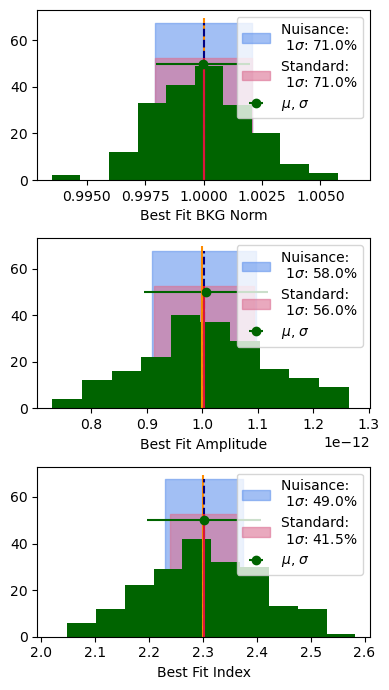

In [15]:
fig, axs = plt.subplots(3,1, figsize = (4,7))
xlabels = ["Best Fit BKG Norm", "Best Fit Amplitude", "Best Fit Index"]

axs[2].errorbar(x = np.mean(indices[:,0]) ,y = 50, xerr = np.std(indices[:,0]), fmt='o', 
                color = color_rnd, label = "$\mu$, $\sigma$")
axs[1].errorbar(x = np.mean(amplitudes[:,0]) ,y = 50, xerr = np.std(amplitudes[:,0]), fmt='o',
               color = color_rnd, label = "$\mu$, $\sigma$")
axs[0].errorbar(x = np.mean(norms[:,0]) ,y = 50, xerr = np.std(norms[:,0]), fmt='o',
               color = color_rnd, label = "$\mu$, $\sigma$")
    
inputs = [1.0, 1e-12, 2.3]
for i, v in enumerate(valuies):
    axs[i].hist(v[1:,0], color =color_rnd)
    ylim = axs[i].get_ylim()
    delta_ylim = 15
    axs[i].vlines(inputs[i], ylim[0], ylim[1]+ delta_ylim+2, color = color_input)
    axs[i].vlines(valuies_asimov_N[i][0], ylim[0], ylim[1]+ delta_ylim, color = color_nui, 
                 linestyle= 'dashed', )
    axs[i].fill_between([valuies_asimov_N[i][0] - valuies_asimov_N[i][1],
                         valuies_asimov_N[i][0] + valuies_asimov_N[i][1]]
                        , ylim[0], ylim[1]+ delta_ylim,
                       alpha = 0.6, color = color_nui_e, 
                        label = f'Nuisance: \n 1$\sigma$: {withins[i][1]*100 :.3}%')
    axs[i].vlines(valuies_asimov[i][0], ylim[0], ylim[1], color = color_standard)
    axs[i].fill_between([valuies_asimov[i][0] - valuies_asimov[i][1],
                         valuies_asimov[i][0] + valuies_asimov[i][1]]
                        , ylim[0], ylim[1],
                       alpha = 0.6 , color = color_standard_e, 
                        label = f'Standard: \n 1$\sigma$: {withins[i][0]*100 :.3}%'  )
    
    axs[i].legend(loc = 'upper right')  
    axs[i].set_xlabel(xlabels[i])  
    
    
    x = axs[i].get_xlim()
    deltax = np.max([ valuies_asimov[i][0] - x[0] , x[1] - valuies_asimov[i][0] ])
    axs[i].set_xlim(valuies_asimov[i][0] -deltax, 
                    valuies_asimov[i][0] + deltax)
    
    axs[i].hist(v[1:,0], color =color_rnd)
    

plt.tight_layout()

if savefig:
    fig.savefig(f"plots/7b_histo_{bias}_{N}."+ picformat)

In [16]:
mask = dataset_asimov.mask.data[:,60,60]
ebins = dataset_asimov.counts.geom.axes[0].center[mask]
asimov, asimov_errors = dataset.models[0].spectral_model.evaluate_error(ebins)
asimov_N, asimov_errors_N = dataset_N.models[0].spectral_model.evaluate_error(ebins)


In [17]:
withine = []
withine_N = []

for ie, e in enumerate(ebins):
    xs = []
    xs_N = []
    for f in flux:
        value = f[ie]   
        lowerlim = (np.all(value <= asimov.value[ie] + asimov_errors.value[ie]))
        upperlim = (np.all(value >= asimov.value[ie] - asimov_errors.value[ie]))
        x = lowerlim & upperlim
        xs.append(x)
        
        lowerlim = (np.all(value <= asimov_N.value[ie] + asimov_errors_N.value[ie]))
        upperlim = (np.all(value >= asimov_N.value[ie] - asimov_errors_N.value[ie]))
        x = lowerlim & upperlim
        xs_N.append(x)
        
        
    withine.append(np.count_nonzero(xs) / N)
    withine_N.append(np.count_nonzero(xs_N) / N)


In [18]:
mean = flux2e.mean(axis = 0)
std = flux2e.std(axis = 0)

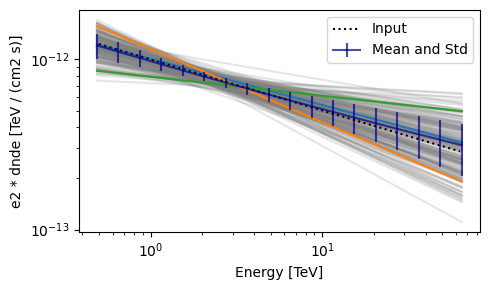

In [19]:
true_energy = dataset_asimov.exposure.geom.axes[0].center.value
energy_bounds = (ebins[0] , ebins[-1] ) *u.TeV
fig, axs = plt.subplots(1,1,figsize = (5,3) )
for i, f in enumerate(flux2e):
    axs.plot(ebins, f, color = 'grey', alpha = 0.2)#10/N)
for i, f in enumerate(flux2e[:3]):
    axs.plot(ebins, f,)
axs.errorbar(ebins, mean, yerr = std,  color = 'darkblue', alpha = 0.7,
            label = "Mean and Std")

dataset_asimov.models[0].spectral_model.plot(energy_bounds, linestyle=':', energy_power = 2, ax = axs,
                                label = "Input", color = "black", )
axs.legend()
axs.set_xlabel("Energy [TeV]")
plt.tight_layout()
#if savefig:
#    fig.savefig(f"plots/7b_rnd_spectra_{shift}_{N}." + picformat)

In [20]:
def compute_precision(N):
    Z = 1.645
    return  Z / np.sqrt(N)

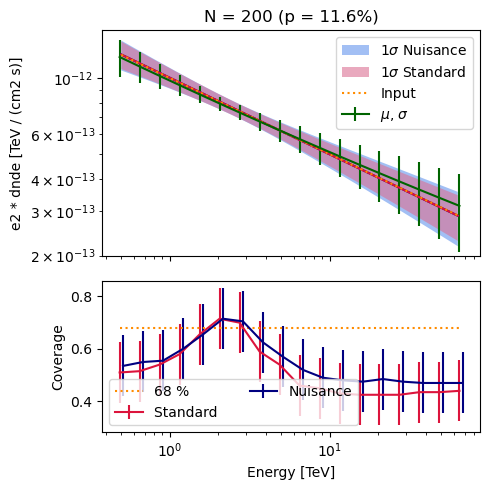

In [22]:
true_energy = dataset.exposure.geom.axes[0].center.value
energy_bounds = (ebins[0] , ebins[-1] ) *u.TeV
fig, (axs, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 2]},
                         sharex = True, figsize = ((5,5)))
axs.errorbar(ebins, mean, yerr = std,  color = color_rnd, alpha = 1,
            label = "$\mu$, $\sigma$")
dataset_N.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs,
                                label = "", color = color_nui)    

dataset_N.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs,
                                label = "$1\sigma$ Nuisance", facecolor = color_nui_e, alpha = 0.6)    
    
dataset.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs,
                                label = "", color = color_standard)    

dataset.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs,
                                label = "$1\sigma$ Standard", facecolor = color_standard_e, alpha = 0.6)

dataset_asimov.models[0].spectral_model.plot(energy_bounds, linestyle=':', energy_power = 2, ax = axs,
                                label = "Input", color = color_input, )
p = compute_precision(N)
ax2.errorbar(ebins, withine, yerr = p,  color = color_standard, label = f"Standard ")
ax2.errorbar(ebins*1.05, withine_N, yerr = p , color = color_nui, label = "Nuisance")
ax2.plot(ebins, [0.68] * len(ebins), ':', color = color_input, label = "68 %")

axs.set_xlabel('')
axs.legend()
ax2.legend(ncol = 2)
axs.set_title(f"N = {N} (p = {p*100:.3}%)")
ax2.set_xlabel('Energy [TeV]')
ax2.set_ylabel('Coverage')

plt.tight_layout()
if savefig:
    fig.savefig(f"plots/7b_spectra_{bias}_{N}." + picformat)
